While ARIMA excepts the parameters (p,d,q), SARIMAX accepts an additional set of parameters (P,D,Q)m that specifically describe the seasonal components of the model.

The 'X' in SARIMAX means that the function also supports *exogenous regressor variables*.

Here we'll make use of the exogenous variables.

**Exogenous Variables :** These are the parameters on which the timeseries depends. Like Resturant business might depend on the holidays. But we have to make sure that for forecasting into the future, we should know the values of these *exogenous variables* for the future.

### **So, if we want to predict the resturant business for the next month, we should know the holidays on that month beforehand.**

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r'C:\Users\nevishwakarma\Documents\Datasets\Data_Udemy\RestaurantVisitors.csv', index_col=['date'], parse_dates=True)
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


Here, we can see there are two columns with exogenous variables, 'weekday' and 'holiday'. there are external factors which can affect the resturant's business on that day.

We'll do this in two parts, first we'll run a simple ARIMA model then we'll add the exogenous variable.

**Step 1 : Visualize the Dataset**

In [6]:
df = df.dropna()

In [8]:
df.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [9]:
cols = ['rest1', 'rest2', 'rest3', 'rest4', 'total']

for i in cols:
    df[i] = df[i].astype(int)

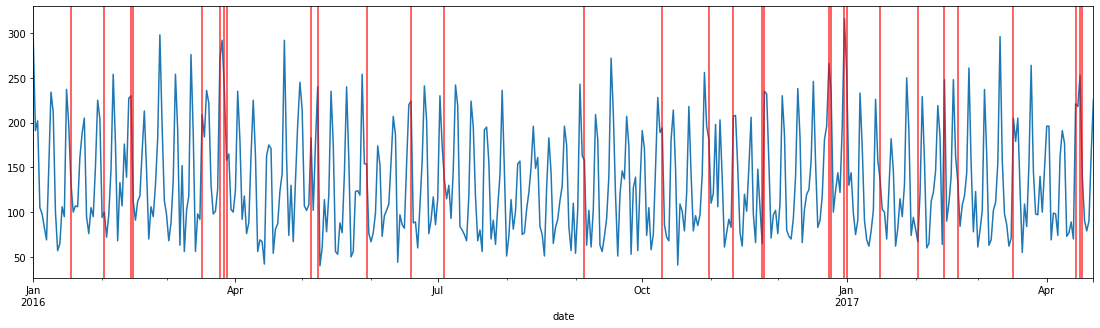

In [19]:
ax = df['total'].plot(figsize=(19,5))

for day in df[df['holiday']==1].index:
    ax.axvline(x=day, color='red', alpha=0.8);

Visually we can't figure any relation between holidays and resturant businesses, but probably SARIMAX model can do that. Also we can't see if there is a seasonal component. So let's try seasonal decompose to check.

In [20]:
 from statsmodels.tsa.seasonal import seasonal_decompose

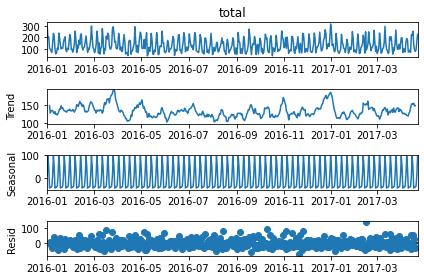

In [22]:
result = seasonal_decompose(df['total'])
result.plot();

<AxesSubplot:xlabel='date'>

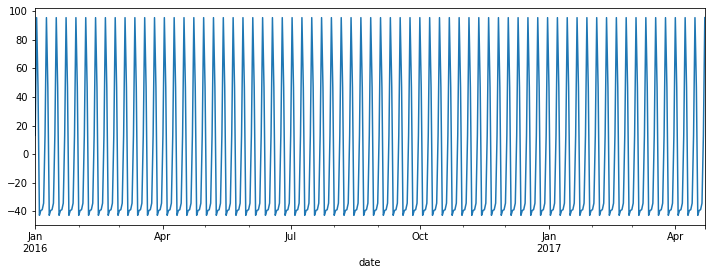

In [23]:
result.seasonal.plot(figsize=(12,4))

Clearly, there is a strong seasonal component and sesonality is weekly.

**Step 3 : Calculating (p,d,q) and (P,D,Q,m)**

In [25]:
from pmdarima import auto_arima

In [31]:
auto_arima(df['total'], seasonal=True, m=7).summary() # The seasonal cycle repeats after every week. So m = 7

C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(1,0,0)(2,0,1)[7] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\pmdarima\arima\arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\pmdarima\arima\arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\pmdarima\arima\arima.py", line 508, in _fit_wrapper
    return arima, arima.fit(s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2384.859
Date:                   Thu, 30 Dec 2021   AIC                           4777.718
Time:                           16:21:41   BIC                           4794.397
Sample:                                0   HQIC                          4784.275
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7443      1.708      2.777      0.005       1.396       8.093
ar.S.L7        0.9611      0.013     71.651      0.000       0.935       0.987
ma.S.L7       -0.7464      0.051    -14.727      0.000      -0.846      -0.647
sigma2      1256.7889     76.889     16.345      0.000    1106.089    1407.489
===================================================================================
Ljung-Box (L1) (Q):                  16.00   Jarque-Bera (JB):                64.65
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.75
Prob(H) (two-sided):                  0.32   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Step 4 : Train - Test Split**

In [28]:
len(df)

478

In [29]:
train = df.iloc[:436]
test = df.iloc[436:]

**Step 5 : Modelling - SARIMA**

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [33]:
model = SARIMAX(train['total'], order=(1, 0, 0), seasonal_order=(2, 0, 0, 7), enforce_invertibility=False)
results = model.fit()

C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Thu, 30 Dec 2021   AIC                           4457.403
Time:                                   16:23:34   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                29.23
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Step 6 : Prediction for Testing**

In [35]:
start = len(train)
end = start + len(test) - 1

In [44]:
predictions = results.predict(start,end,typ='levels').rename('SARIMA Model')

<AxesSubplot:xlabel='date'>

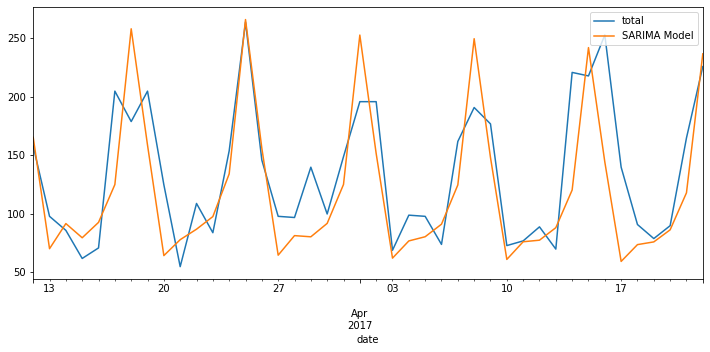

In [45]:
test['total'].plot(figsize=(12,5), legend=True)
predictions.plot(figsize=(12,5), legend=True)

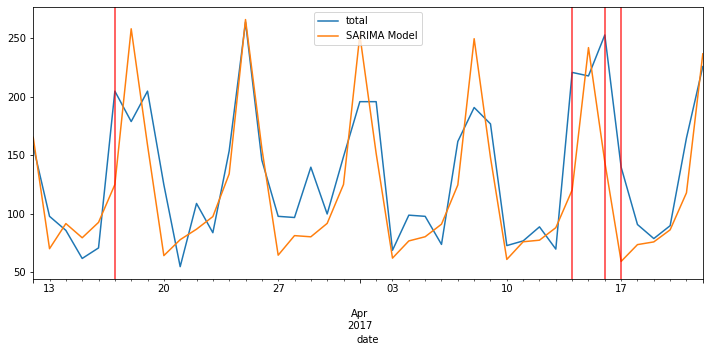

In [46]:
ax = test['total'].plot(figsize=(12,5), legend=True)
predictions.plot(figsize=(12,5), legend=True)

for day in df[df['holiday']==1].index:
    ax.axvline(x=day, color='red', alpha=0.8);

**Step 7 : Model Evaluation**

In [38]:
from statsmodels.tools.eval_measures import rmse

In [40]:
error = rmse(test['total'], predictions)
error

41.26315494841629

In [42]:
test['total'].mean()

134.26190476190476

In [43]:
predictions.mean()

120.72598708273065

We see above is 'okayish' predictions and rmse. Let's now see by adding the exogenous variables will be able to make model better or not.

## **SARIMAX Model**

**Step 3 : Calculating (p,d,q) and (P,D,Q,m) based on Exogenous Data as well**

In [48]:
auto_arima(df['total'], exogenous=df[['holiday']], seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2359.844
Date:                             Thu, 30 Dec 2021   AIC                           4731.687
Time:                                     16:58:23   BIC                           4756.705
Sample:                                 01-01-2016   HQIC                          4741.523
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.2755      3.310      6.125      0.000      13.787      26.764
holiday       55.6660      4.334     12.843      0.000      47.171      64.161
ar.L1          0.1565      0.046      3.418      0.001       0.067       0.246
ar.S.L7        0.8091      0.028     29.122      0.000       0.755       0.864
ma.S.L7       -0.3024      0.061     -4.953      0.000      -0.422      -0.183
sigma2      1066.6414     72.976     14.616      0.000     923.611    1209.672
===================================================================================
Ljung-Box (L1) (Q):                   1.48   Jarque-Bera (JB):                 6.61
Prob(Q):                              0.22   Prob(JB):                         0.04
Heteroskedasticity (H):               0.91   Skew:                             0.28
Prob(H) (two-sided):                  0.57   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Step 4 : Train Test Split**

In [49]:
train = df.iloc[:436]
test = df.iloc[436:]

**Step 5 : Modelling SARIMAX**

In [50]:
model = SARIMAX(train['total'], exog=train[['holiday']], order=(1, 0, 0), seasonal_order=(1, 0, [1], 7), enforce_invertibility=False)

C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [52]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2089.208
Date:                             Thu, 30 Dec 2021   AIC                           4188.417
Time:                                     17:00:46   BIC                           4208.805
Sample:                                 01-01-2016   HQIC                          4196.463
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       68.9355      3.773     18.271      0.000      61.541      76.330
ar.L1          0.2101      0.044      4.762      0.000       0.124       0.297
ar.S.L7        1.0000   5.78e-05   1.73e+04      0.000       1.000       1.000
ma.S.L7       -0.9581      0.022    -43.532      0.000      -1.001      -0.915
sigma2       779.3163     44.867     17.369      0.000     691.378     867.254
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                20.47
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.22
Prob(H) (two-sided):                  0.88   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Step 6 : Prediction for Testing**

In [53]:
start = len(train)
end = start + len(test) - 1

In [58]:
predictions = results.predict(start,end,exog=test[['holiday']]).rename('SARIMAX with Exog')

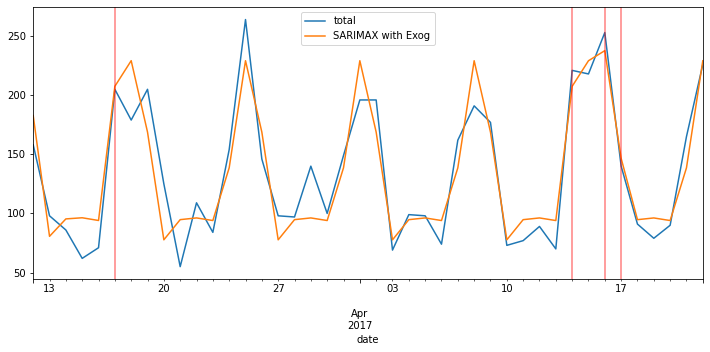

In [60]:
ax = test['total'].plot(figsize=(12,5), legend=True)
predictions.plot(figsize=(12,5), legend=True)

for day in df[df['holiday']==1].index:
    ax.axvline(x=day, color='red', alpha=0.5);

**Step 7 : Model Evaluation**

In [61]:
error = rmse(test['total'], predictions)
error

22.929751528009223

In [62]:
test['total'].mean()

134.26190476190476

In [63]:
predictions.mean()

135.4431979618299

Obviously, RMSE for SARIMAX model with Exogenous Variable is less than RMSE for SARIMAX model with no Exogenous Variable. So the Model with Exogenous Variable included is better.

**Step 8 : Forecasting**

In [66]:
model = SARIMAX(df['total'], exog=df[['holiday']], order=(1, 0, 0), seasonal_order=(1, 0, [1], 7), enforce_invertibility=False);
results = model.fit();

C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Now, for forecast, as mentioned, we must know the value of the Exogenous variables. These values are mentioned in the dataset for all the values after the index 478.

In [68]:
df_o = pd.read_csv(r'C:\Users\nevishwakarma\Documents\Datasets\Data_Udemy\RestaurantVisitors.csv', index_col=['date'], parse_dates=True)
df_o[478:].head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-23,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-24,Monday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-25,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-26,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-27,Thursday,0,na,NaN,NaN,NaN,NaN,NaN


In [70]:
exog = df_o[478:][['holiday']]
exog.head()

,holiday
date,
2017-04-23,0
2017-04-24,0
2017-04-25,0
2017-04-26,0
2017-04-27,0


In [71]:
forecasts = results.predict(len(df),len(df) + 38 , exog=exog).rename('SARIMAX Forecast with Exog')

<AxesSubplot:xlabel='date'>

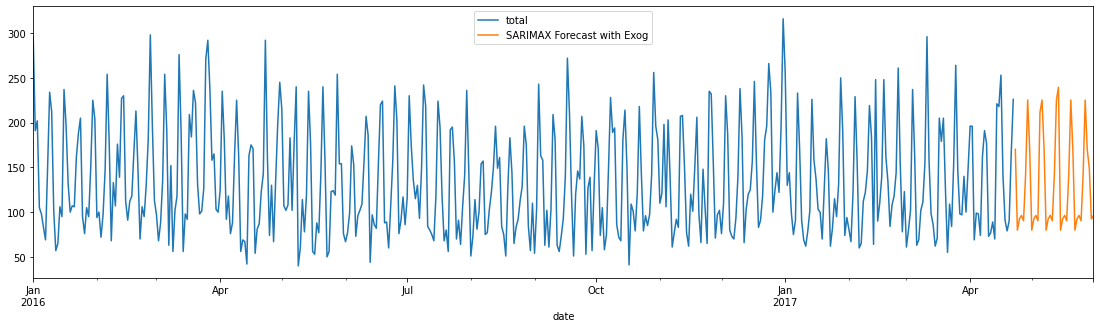

In [73]:
df['total'].plot(figsize=(19,5), legend=True)
forecasts.plot(figsize=(19,5), legend=True)

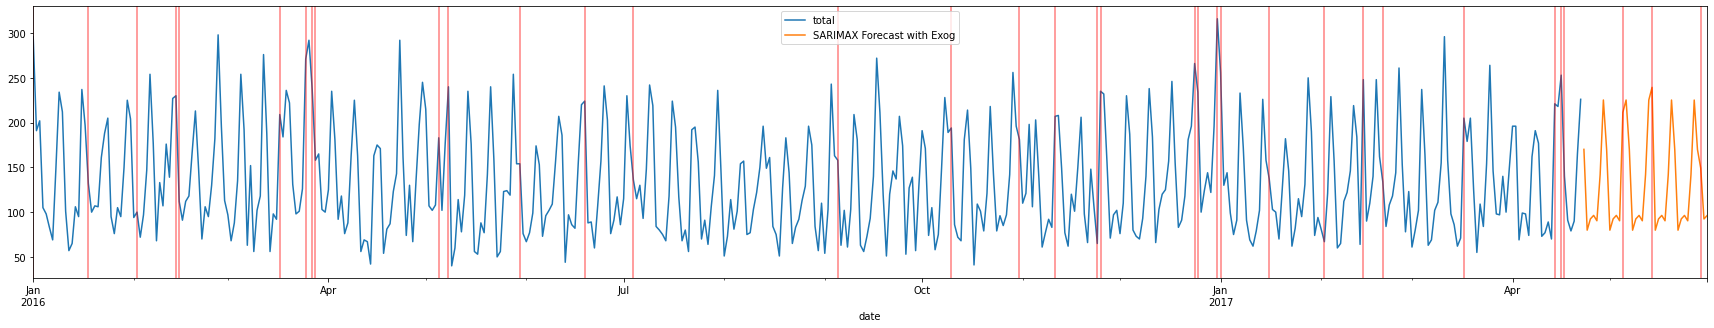

In [76]:
ax = df['total'].plot(figsize=(30,5), legend=True)
forecasts.plot( legend=True)

for day in df_o[df_o['holiday']==1].index:
    ax.axvline(x=day, color='red', alpha=0.5);